In [5]:
noise_size_var = []
ns1 = [] #number of particles in a 520 image
nf1 = [] #number of particles in a 550 image

ns2 = [] #number of particles in a 520 image
nf2 = [] #number of particles in a 550 image

Populating the interactive namespace from numpy and matplotlib


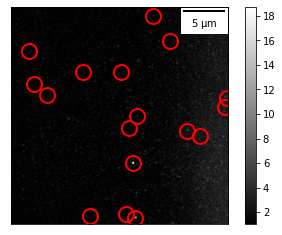

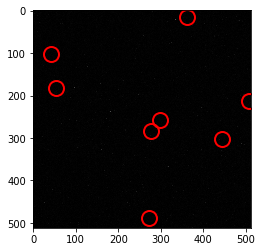

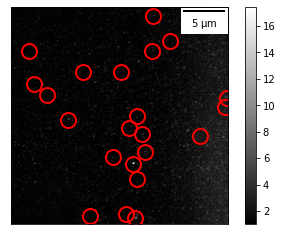

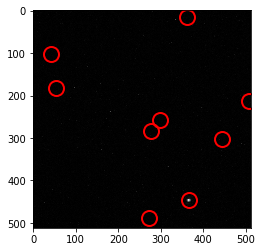

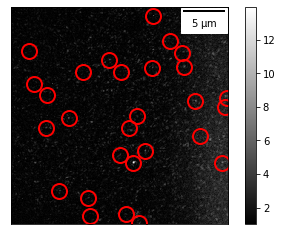

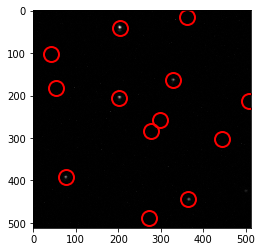

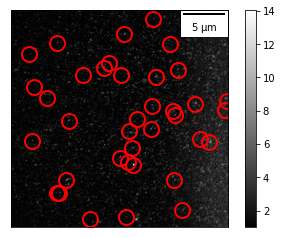

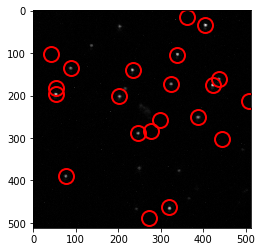

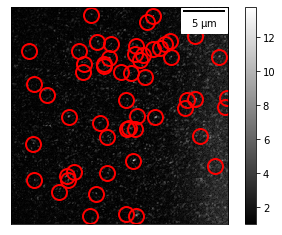

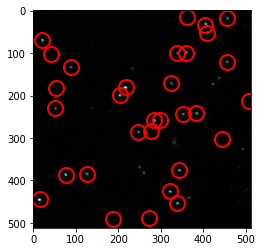

In [7]:
%pylab inline
import glob
import os
from tirftools import get_tdms_images
from natsort import natsorted
import matplotlib.animation as animation
from tirftools import FitGauss2D
import trackpy as tp
from matplotlib_scalebar.scalebar import ScaleBar

data_directory = r'Q:\Val\Jan\26\exp 1'
tdms_files = glob.glob(os.path.join(data_directory,'*.tdms'), recursive=True)
sorted_tdms_files = natsorted(tdms_files)

x_shift = 7.1447
y_shift = 6.0106

for i in range(5):
    image520 = np.mean(get_tdms_images(sorted_tdms_files[2*i]), axis=0)
    image550 = np.mean(get_tdms_images(sorted_tdms_files[2*i+1]), axis=0)
    fig, axs = plt.subplots()
    joe = axs.imshow(image520, 'binary_r')
    f = tp.locate(image520, 3, minmass=3, noise_size= 0.3, separation = 5)    #0.3 and 0.43 for exp 1/ 0.35 and 0.40 for exp 2
    g = tp.locate(image550, 3, minmass=3, noise_size= 0.43, separation = 5)
    axs.set_xticks([])
    axs.set_yticks([])
    scalebar = ScaleBar(50*10**(-9))
    gca().add_artist(scalebar)
    fig.colorbar(joe)
    tp.annotate(f, image520)
    tp.annotate(g, image550)
    ns1.append(len(f['x']))
    nf1.append(len(g['x']))
    show()
    #fig.savefig(r'Q:\Val\Jan\26\test\image%s.pdf' %i)
# print(ns1)
# print(nf1)

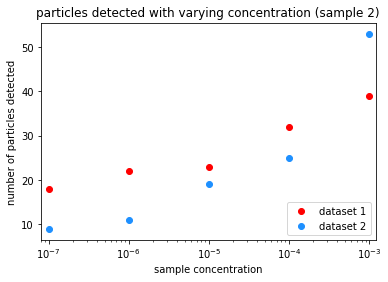

In [26]:
fig , axs = subplots()
x = [1,2,3,4,5]
xis = [10**-7,10**-6,10**-5,10**-4,10**-3]
scatter(xis, ns2, c='red', label = 'dataset 1')
scatter(xis, nf2, c = 'dodgerblue', label = 'dataset 2')
xscale('log')
xlim(0.8*10**-7,1.2*10**-3)
xlabel('sample concentration')
ylabel('number of particles detected')
title('particles detected with varying concentration (sample 2)')
legend(loc='lower right')
fig.savefig(r'Q:\Val\Jan\26\test\sample 2.pdf' )
    
    
    

In [58]:
cha = [20, 24, 27, 40, 45, 20, 24, 27, 40, 45, 20, 24, 27, 40, 45, 20, 23, 
       25, 36, 46, 13, 18, 17, 25, 32, 9, 13, 13, 15, 18, 2, 3, 5, 8, 9, 1, 1, 1,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
cho = np.reshape(cha,(5,11))
print(cho)



[[20 24 27 40 45]
 [20 24 27 40 45]
 [20 24 27 40 45]
 [20 23 25 36 46]
 [13 18 17 25 32]
 [ 9 13 13 15 18]
 [ 2  3  5  8  9]
 [ 1  1  1  0  3]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


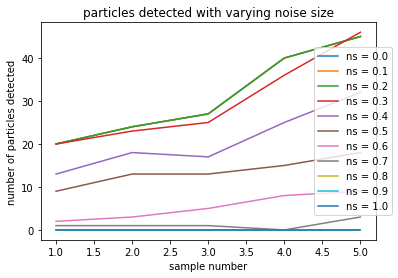

In [93]:
x_axis = [1,2,3,4,5]
fig, axs = subplots()
for i in range(11):
    j = i/10
    plot(x_axis,cho[i], label='ns = %s' %j)
    legend(loc='center left', bbox_to_anchor=(0.8, 0.5))
    title('particles detected with varying noise size')
    xlabel('sample number')
    ylabel('number of particles detected')
    #fig.savefig(r'Q:\Val\Jan\26\exp 2 trackpy\quantitative look at different noise size.pdf')


In [24]:
print(ns1)
print(ns2)

[17, 22, 28, 38, 56]
[18, 22, 23, 32, 39]
